<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Histograms and PDFs</h1>
### Notebook contributed by Leo Siqueira
### Wei-Ming Tsai, 02/15/2018
<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Ways of estimating a PDF from some numbers
1. <a href="#histograms">Histograms</a>
1. <a href="#kernels">Kernels</a>

### <center>Step 1. Import packages needed for our analysis<center>

In [44]:
%matplotlib inline
import os # get direction 
import datetime as dt # standard library datetime
import matplotlib
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap as bp
import seaborn

### <center>Step 2. Reading data by powerful packages: netcdf<center>

In [45]:
# Reading data : NCEP Reanalysis data 2.5 degree
os.chdir("/Users/willytsai/MPO624_data/data");
os.getcwd()
os.getcwd() 

nc_fid=Dataset('uwnd.day.2010_2016.45NS.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
uwnd = nc_fid.variables['u'][:]  # shape is time, lat, lon as shown above

### Before heading into detailed statistics, check the data by geolocationally maps.

In [46]:
# derive Annual, JJA & DJF data
u200=numpy.squeeze(uwnd[:,10,:,:]); # zonal wind at 200hpa 
u200_annual=numpy.squeeze(numpy.mean(uwnd[:,10,:,:],axis=0)); # annual mean
u200_JJA=numpy.zeros((7,len(lats),len(lons))) # JJA mean
u200_DJF=numpy.zeros((7,len(lats),len(lons))) # DJF mean
A=list(range(151,244));B=list(range(0,31))+list(range(304,365));
for i in range(7):
    JJA=numpy.ndarray.tolist(numpy.array(A)+365*i*numpy.ones((1,len(A))))
    DJF=numpy.ndarray.tolist(numpy.array(B)+365*i*numpy.ones((1,len(B))))
    u200_JJA[i,:,:]=numpy.mean(u200[list(map(int,JJA[0])),:,:],axis=0)
    u200_DJF[i,:,:]=numpy.mean(u200[list(map(int,DJF[0])),:,:],axis=0)

u200_JJAmean=numpy.mean(u200_JJA,axis=0);
u200_DJFmean=numpy.mean(u200_DJF,axis=0);

/Users/willytsai/anaconda2/envs/MPO624/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'shading'
  s)


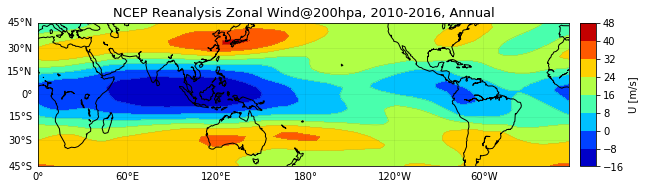

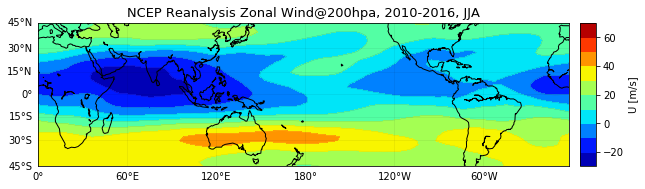

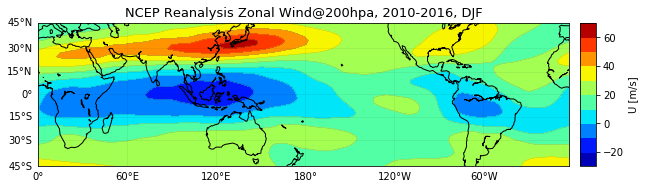

In [47]:
def mapplot(data,title,scale=False,clev=[]):
        m=bp(projection='mill',lat_ts=10,llcrnrlon=lons.min(), \
        urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
        resolution='c')
        x, y = m(*numpy.meshgrid(lons,lats))

# plot the field using the fast pcolormesh routine 
        plt.figure(figsize=(10,4))
        #plt.subplot(211)
        if scale==True:    
            v=numpy.linspace(clev[0],clev[1],clev[2]);
            m.contour(x,y,data,v,linewidths=0.2)
            m.contourf(x,y,data,v,shading='flat',cmap=plt.cm.jet)
        else:
            m.contour(x,y,data,linewidths=0.2)
            m.contourf(x,y,data,shading='flat',cmap=plt.cm.jet)
        cbar=m.colorbar(location='right',size='3%')
        cbar.set_label('U [m/s]')
# Add a coastline and axis values.
        m.drawcoastlines()
        m.drawparallels(numpy.arange(-45.,46.,15.),labels=[1,0,0,1],linewidth=0.1)
        m.drawmeridians(numpy.arange(-180.,181.,60.),labels=[0,0,0,1],linewidth=0.1)
        plt.title(title,fontsize=13);
mapplot(u200_annual,'NCEP Reanalysis Zonal Wind@200hpa, 2010-2016, Annual')
mapplot(u200_JJAmean,'NCEP Reanalysis Zonal Wind@200hpa, 2010-2016, JJA',True,[-30,70,11])
mapplot(u200_DJFmean,'NCEP Reanalysis Zonal Wind@200hpa, 2010-2016, DJF',True,[-30,70,11])


In [48]:
# read data geopotential height
os.chdir("/Users/willytsai/MPO624_data/data");
os.getcwd()

nc_fid=Dataset('hgt.day.2010_2016.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
hgt = nc_fid.variables['hgt'][:]  # shape is time, lat, lon as shown above

# define vertical wind shear and geopotential depth
sel_latup=25; sel_latdn=0; sel_latu=20;# selected latitude 
latlist=numpy.ndarray.tolist(lats);
latup=latlist.index(sel_latup);latdn=latlist.index(sel_latdn);latu=latlist.index(sel_latu);
zg=numpy.squeeze(hgt[:,10,:,:]-hgt[:,6,:,:]); 
zg_diff=numpy.squeeze(zg[:,latdn,:]-zg[:,latup,:]); # diff of geopotential depth 200hpa-500hpa, EQ-25N
ug=numpy.squeeze(uwnd[:,10,latu,:]-uwnd[:,6,latu,:]); # vertical shear 200hpa and 500hap at 20N
ug_re=numpy.reshape(ug,(1,numpy.shape(ug)[0]*numpy.shape(ug)[1]));
zg_re=numpy.reshape(zg_diff,(1,numpy.shape(zg_diff)[0]*numpy.shape(zg_diff)[1]));

### <center> Step 3. Consider some (pairs of) numbers: a scatterplot<center>

Text(0.5,1,'NCEP Reanalysis Daily, 12/31')

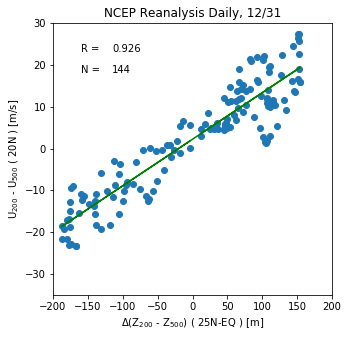

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(zg_diff[2000,:],ug[2000,:]);
fit=numpy.polyfit(zg_diff[2000,:],ug[2000,:],1);
r,p=numpy.corrcoef(zg_diff[2000,:],ug[2000,:]);
fit_fn=numpy.poly1d(fit);
plt.plot(zg_diff[2000,:],fit_fn(zg_diff[2000,:]),'-g')
plt.xlim(-200,200);plt.ylim(-35,30)
plt.xlabel("$\Delta$(Z$_{200}$ - Z$_{500})$ ( 25N-EQ ) [m]")
plt.ylabel("U$_{200}$ - U$_{500}$ ( 20N ) [m/s]");
plt.text(-160,23,'R =');plt.text(-115,23,round(r[1],3))
plt.text(-160,18,'N =');plt.text(-115,18,numpy.shape(uwnd)[3])
plt.title('NCEP Reanalysis Daily, 12/31')

### Looks great ! But...what if more data points in this figure? A huge MESS !

<a name="histograms"></a>
### Beyond the scatterplot: histogram methods
The dots cover each other, so a better way to look at this is to _contour or image the data density in bins_,
counting how many points fall in each bin. Let's do it first in the general plotting package Matplotlib, then in a more specifically statistal graphics package called Seaborn.

Text(-95,23,'0.865')

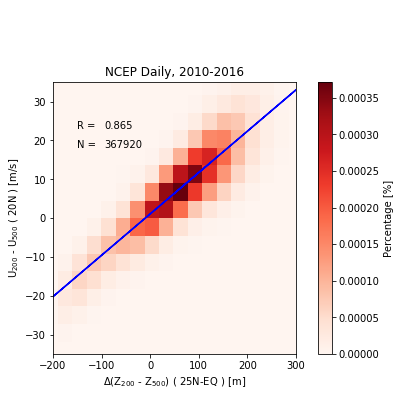

In [50]:
plt.figure(figsize=(5,5))
plt.hist2d(zg_re[0,:],ug_re[0,:],cmap=plt.cm.Reds,bins=20,cmin=0.,normed=True);
plt.xlim(-200,300);plt.ylim(-35,35)
fit=numpy.polyfit(zg_re[0,:],ug_re[0,:],1);
r,p=numpy.corrcoef(zg_re[0,:],ug_re[0,:]);
fit_fn=numpy.poly1d(fit);
plt.plot(zg_re[0,:],fit_fn(zg_re[0,:]),'-b')
cbar=plt.colorbar(cmap=plt.cm.Reds,fraction=0.05,pad=0.08)
cbar.set_label('Percentage [%]')
plt.xlabel("$\Delta$(Z$_{200}$ - Z$_{500})$ ( 25N-EQ ) [m]")
plt.ylabel("U$_{200}$ - U$_{500}$ ( 20N ) [m/s]");
plt.title('NCEP Daily, 2010-2016')
plt.text(-150,18,'N =');plt.text(-95,18,numpy.shape(ug_re)[1])
plt.text(-150,23,'R =');plt.text(-95,23,round(r[1],3))

#### Seaborn packages: An example for jointplot

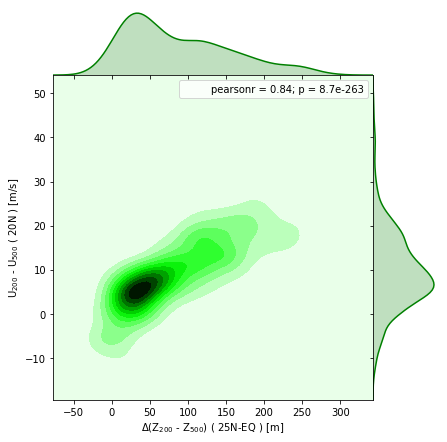

In [51]:
plt.figure()
h=seaborn.jointplot(zg_re[0,:1000],ug_re[0,:1000],kind='kde',color='g',space=0);
h.set_axis_labels("$\Delta$(Z$_{200}$ - Z$_{500})$ ( 25N-EQ ) [m]",\
             "U$_{200}$ - U$_{500}$ ( 20N ) [m/s]");